## Load Data

In [32]:
# Load the Excel file data in sheet number 2 using pandas
import pandas as pd
pd.set_option("display.max_columns", None)

# Load the Excel file data in sheet number 2 using pandas, use the first row as the column names
df = pd.read_excel("Case Study for Data Scientist.xlsx", sheet_name="Sheet1", header=0)
df.head()

,Day,Date,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
0,Wed,2020-01-01,R01,Z001,IP,0.00,300.000000,95.157670,1.241942,4.734563,6.833731,0.000000,15.721261,0.000000,0.000000,0.000,31.114312,0.0,68.885688,49.290868,50.709132
1,Thu,2020-01-02,R01,Z001,IP,22.27,289.458286,95.430159,1.859710,3.931418,7.475889,3.342912,13.950932,1.387521,0.254744,648.373,39.927122,0.0,60.072878,46.188086,53.811914
2,Fri,2020-01-03,R01,Z001,IP,22.55,262.890977,94.617481,1.514098,3.568296,7.416632,24.355107,13.322048,1.484348,0.058243,530.021,37.392953,0.0,62.607047,45.361864,54.638136
3,Sat,2020-01-04,R01,Z001,IP,22.12,262.653835,95.404031,1.457055,4.809152,7.225248,1.208765,14.120394,1.364690,0.099324,702.527,33.681927,0.0,66.318073,51.698756,48.301244
4,Sun,2020-01-05,R01,Z001,IP,0.00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN


In [33]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
print(len(categorical_features))

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
#numerical_features = numerical_features.drop('Actual OER %')
print(numerical_features)
print(len(numerical_features))

label = 'Actual OER %'


Index(['Day', 'Region', 'Mill Code', 'Mill Type'], dtype='object')
4
Index(['Actual OER %', 'Crop Freshness Score', 'Ripe %', 'Long Stalk %',
       'Rat Damage %', 'Loose Fruits %', 'Rainfall (mm)',
       'Age Profile (years)', 'Total Oil Losses %', 'Downtime %',
       'FFB Processed (MT)', 'Seed A %', 'Seed B %', 'Other Seeds %',
       'Coastal %', 'Inland %'],
      dtype='object')
16


## Feature Engineering

In [34]:
# ZO22 is chosen as the mill code to be analyzed
zo22 = df[df['Mill Code'] == 'Z013']
# set the Date as the index
zo22 = zo22.set_index('Date')
zo22.head(10)


,Day,Region,Mill Code,Mill Type,Actual OER %,Crop Freshness Score,Ripe %,Long Stalk %,Rat Damage %,Loose Fruits %,Rainfall (mm),Age Profile (years),Total Oil Losses %,Downtime %,FFB Processed (MT),Seed A %,Seed B %,Other Seeds %,Coastal %,Inland %
Date,,,,,,,,,,,,,,,,,,,,
2020-01-01,Wed,R02,Z013,IP,0.00,300.000000,80.182149,2.766647,7.210191,6.339536,0.000000,9.447821,0.000000,0.000000,0.000,8.390367,0.000000,91.609633,82.195041,17.804959
2020-01-02,Thu,R02,Z013,IP,22.15,281.000465,82.657410,2.847804,7.371022,10.763054,8.032153,9.364802,1.319473,0.024448,446.315,1.071354,0.000000,98.928646,61.805700,38.194300
2020-01-03,Fri,R02,Z013,IP,0.00,285.398388,82.225266,2.522006,5.718668,2.854806,7.736928,11.121556,0.000000,0.000000,0.000,6.001510,0.000000,93.998490,67.253816,32.746184
2020-01-04,Sat,R02,Z013,IP,19.89,282.082143,83.240038,3.270638,7.464708,10.459727,9.509044,11.317018,1.610800,0.054224,468.159,1.697346,0.000000,98.302654,72.430387,27.569613
2020-01-05,Sun,R02,Z013,IP,0.00,270.239774,86.574401,3.548307,7.648801,5.847861,31.419252,11.889726,0.000000,0.000000,0.000,0.000000,0.000000,100.000000,37.864196,62.135804
2020-01-06,Mon,R02,Z013,IP,22.37,289.330459,87.936683,3.066685,6.734878,6.206426,6.916341,12.084396,1.762564,0.147872,347.157,0.476805,2.219019,97.304176,67.845086,32.154914
2020-01-07,Tue,R02,Z013,IP,0.00,285.962145,83.047319,3.017876,2.178759,5.464458,11.648207,10.888256,0.000000,0.000000,0.000,7.885690,2.289306,89.825004,72.194630,27.805370
2020-01-08,Wed,R02,Z013,IP,20.42,275.718290,86.151483,3.995211,7.072296,8.004161,2.475473,11.561366,1.848618,0.037508,440.340,9.140300,2.338331,88.521369,64.895304,35.104696
2020-01-09,Thu,R02,Z013,IP,23.02,289.642535,86.249098,2.717862,6.489738,5.626834,38.731676,11.082954,2.005188,0.049318,370.766,6.766065,2.732541,90.501394,69.776995,30.223005


## Model Training

In [35]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.svm import SVC
from sklego.meta import ZeroInflatedRegressor
from sklearn.ensemble import RandomForestClassifier

lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
lgbm = LGBMRegressor()
svm = SVC()



zir = ZeroInflatedRegressor(classifier=RandomForestClassifier(), regressor=LGBMRegressor())

def train_model(model, X_train, y_train, X_test, y_test, X, y):
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Calculate the R^2 score
    r2 = r2_score(y_test, y_pred)
    print("R^2 Score:", r2)

    # Calculate the RMSE
    rmse = mse ** 0.5
    print("Root Mean Squared Error:", rmse)

    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae)

    # Calculate the MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    print("Mean Absolute Percentage Error:", mape)

    # Plot the predicted vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual OER %")
    plt.ylabel("Predicted OER %")
    plt.title("Actual OER % vs Predicted OER %")
    plt.plot([0, 100], [0, 100], color='r', linestyle='--')
    plt.show()

    # Calculate the residuals
    residuals = y_test - y_pred

    # Plot the residuals
    # plt.scatter(y_test, residuals)
    # plt.xlabel("Actual OER %")
    # plt.ylabel("Residuals")
    # plt.title("Actual OER % vs Residuals")
    # plt.axhline(y=0, color='r', linestyle='--')
    # plt.show()

    # Plot the residuals vs predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted OER %")
    plt.ylabel("Residuals")
    plt.title("Predicted OER % vs Residuals")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

    # Plot the residuals distribution
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residuals Distribution")
    plt.show()

    inference_df = pd.DataFrame()
    inference_df['Predicted OER %'] = model.predict(X)
    inference_df['Actual OER %'] = y.values
    inference_df['Residuals'] = inference_df['Actual OER %'] - inference_df['Predicted OER %']
    inference_df['Date'] = y.index

    # split the data into 2021, 2022, 2023, and 2024
    inference_df['Year'] = inference_df['Date'].dt.year

    # for 2024
    inference_df_2024 = inference_df[inference_df['Year'] == 2024]
    X_train_2024 = X_train[X_train.index.year == 2024]
    X_test_2024 = X_test[X_test.index.year == 2024]
    # using matplotlib
    plt.plot(inference_df_2024['Date'], inference_df_2024['Actual OER %'], label='Actual OER %')
    plt.plot(inference_df_2024['Date'], inference_df_2024['Predicted OER %'], label='Predicted OER %')
    for i in X_train_2024.index:
        plt.axvline(x=i, color='r', linestyle='-', alpha=0.1)
    plt.xlabel('Date')
    plt.ylabel('OER %')
    plt.title('Training Region')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # using matplotlib
    plt.plot(inference_df_2024['Date'], inference_df_2024['Actual OER %'], label='Actual OER %')
    plt.plot(inference_df_2024['Date'], inference_df_2024['Predicted OER %'], label='Predicted OER %')
    for i in X_test_2024.index:
        plt.axvline(x=i, color='g', linestyle='-', alpha=0.1)
    plt.xlabel('Date')
    plt.ylabel('OER %')
    plt.title('Testing Region')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # using plotly
    import plotly.express as px
    fig = px.line(inference_df, x='Date', y=['Actual OER %', 'Predicted OER %'])
    fig.show()

    return model

In [36]:
## Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
#       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
#       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
#       'Seed B %', 'Other Seeds %', 'Coastal %', 'Inland %'],
#      dtype='object')

zo22_df = zo22.copy()

# drop null values in zo22_df (R^2 Score: 0.63, rmse: 3.40)
zo22_df = zo22_df.dropna()

#refined_features = numerical_features.drop([label, 'Other Seeds %', 'Inland %'])
#refined_features = [
#  "Downtime %",
#  "FFB Processed (MT)",
#  "Total Oil Losses %",
#  "Crop Freshness Score",
#  "Ripe %",
#  "Loose Fruits %",
#]

refined_features = numerical_features.drop([label,"Other Seeds %", "Seed B %", "Inland %"])
# filter the features

X = zo22_df[refined_features]

y = zo22_df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.columns)


Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Coastal %'],
      dtype='object')


/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`,

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2958
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 12
[LightGBM] [Info] Start training from score 21.182543
Mean Squared Error: 2.345057043846061
R^2 Score: 0.9341162709560678
Root Mean Squared Error: 1.5313579084740645
Mean Absolute Error: 0.9777375990299002
Mean Absolute Percentage Error: 5.515460434715556


/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



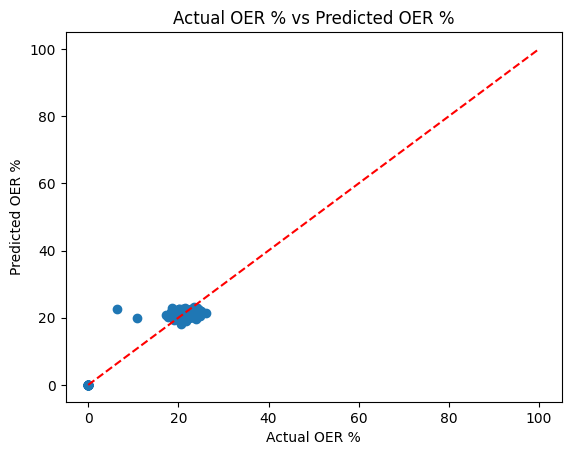

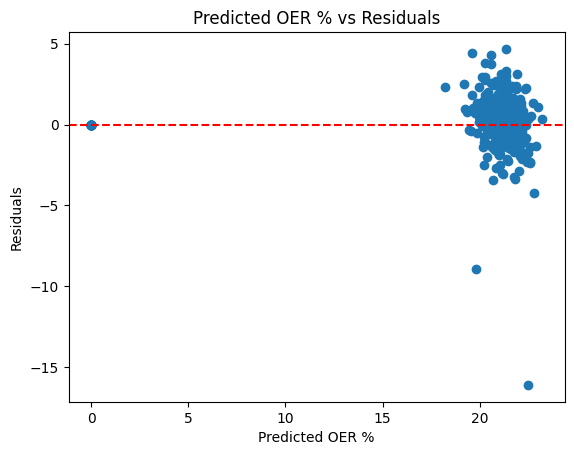

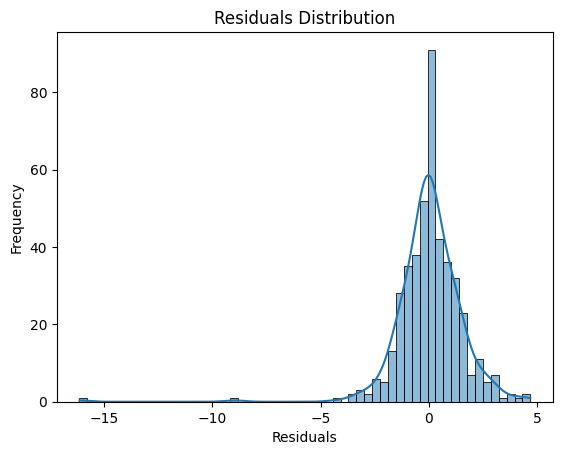

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



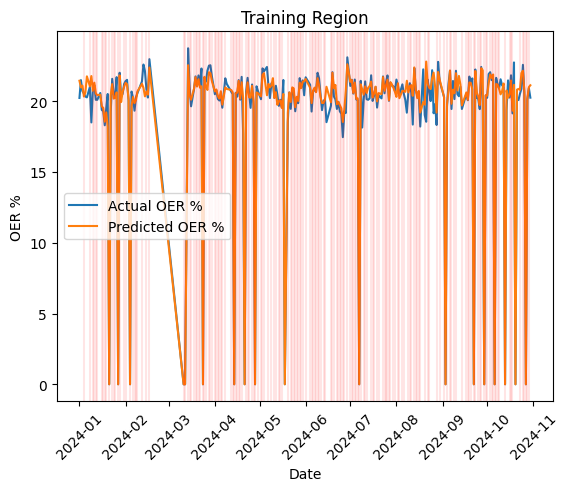

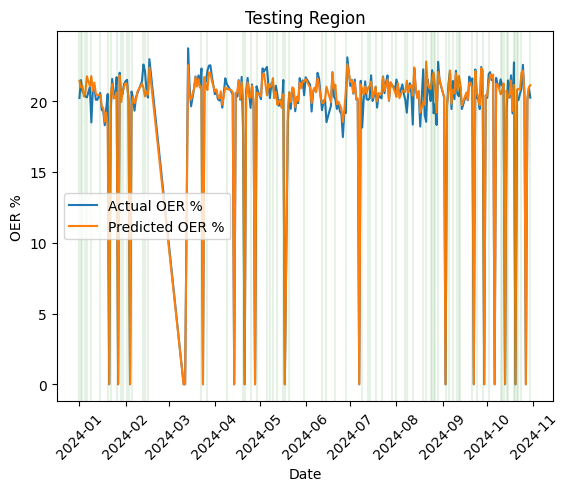

In [37]:
# using the ZeroInflatedRegressor
zir_trained = train_model(zir, X_train, y_train, X_test, y_test, X, y)

## Analyze Model

In [38]:
# Define a prediction function
def predict(X):
    return zir_trained.predict(X)


import shap
# Use SHAP Kernel Explainer to explain the model's predictions for the Actual OER % > 1
explainer = shap.KernelExplainer(predict, shap.sample(X_train, 50))
print(X_train.columns)

Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Coastal %'],
      dtype='object')


/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but ZeroInflatedRegressor was fitted with feature names

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



  0%|          | 0/1042 [00:00<?, ?it/s]/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but ZeroInflatedRegressor was fitted with feature names

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but ZeroInflatedRegressor was fitted with feature names

/Users/amirashrafizham/Desktop/PythonApps/interviews/simedarbyguthrie/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and w

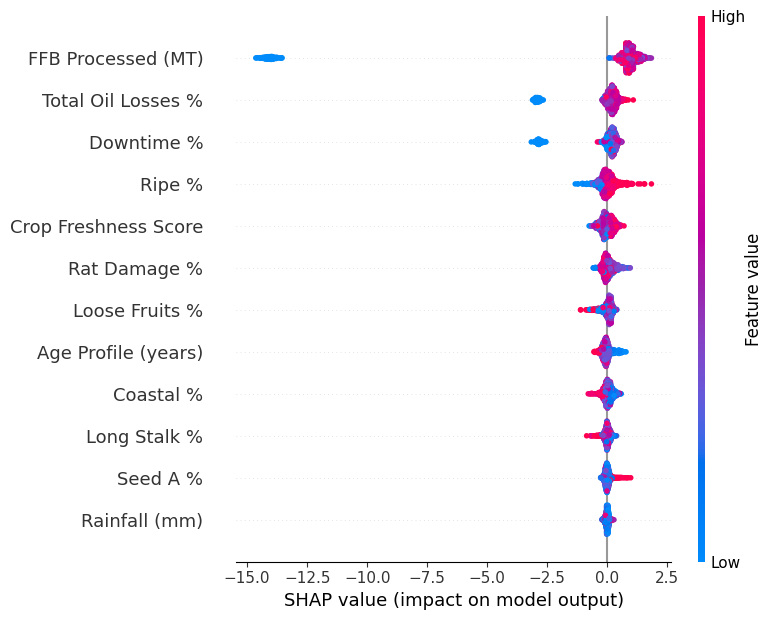

In [39]:

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

In [40]:
print(X_train.columns)

Index(['Crop Freshness Score', 'Ripe %', 'Long Stalk %', 'Rat Damage %',
       'Loose Fruits %', 'Rainfall (mm)', 'Age Profile (years)',
       'Total Oil Losses %', 'Downtime %', 'FFB Processed (MT)', 'Seed A %',
       'Coastal %'],
      dtype='object')


In [41]:
# save the trained zir model
import joblib
joblib.dump(zir_trained, 'zir_trained.pkl')

['zir_trained.pkl']